# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import mglearn
from sklearn.datasets import make_moons, make_blobs, make_circles


df = pd.read_excel('alldata.xlsx')
drdata = pd.read_excel('drdata.xlsx')
tv2data = pd.read_excel('tv2data.xlsx')
electeddata = pd.read_excel('electeddata.xlsx')
drq = pd.read_excel('drq.xlsx')
tv2q = pd.read_excel('tv2q.xlsx')

display(df.head)
print(df.shape)

<bound method NDFrame.head of      530  531  533  534  535  537  538  540  541  543  ...  9a  9b  10a  10b  \
0     -1   -2    1   -2    2    1   -2    1    1    2  ...   2   0    1   -2   
1      2    2   -1   -2   -1   -2    1   -2    2   -2  ...  -2   0   -1    2   
2      2    1   -2   -2    1   -2    1   -1    1   -1  ...  -1  -2    0    2   
3      2    1   -2   -1    1    1    1    1    1   -2  ...  -2   2    2    2   
4      1    1   -2    2   -2    1   -2    1    2   -2  ...  -2   0   -1    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ...  ...   
862    1    1    1   -2    2   -1    1   -2    1    1  ...   1   2   -1    2   
863    1   -2   -2   -2    1   -2   -1   -2   -2   -2  ...  -1   0   -1    2   
864    1    1    1   -2    2   -1    1   -1   -1    1  ...  -1   0   -1    2   
865    1   -1    1   -2    1   -1   -1   -1   -1    1  ...   0   0    0    2   
866    1    1   -1   -2    1   -1    1   -1    1   -1  ...  -2  -1   -1    2   

     11a 

(867, 53)


In [2]:
df.columns

Index(['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
       '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
       '556', '557', '559', '561', '563', 'navn', 'parti', '1a', '1b', '2a',
       '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a',
       '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', 'storkreds',
       'alder'],
      dtype='object')

# Preprocessing

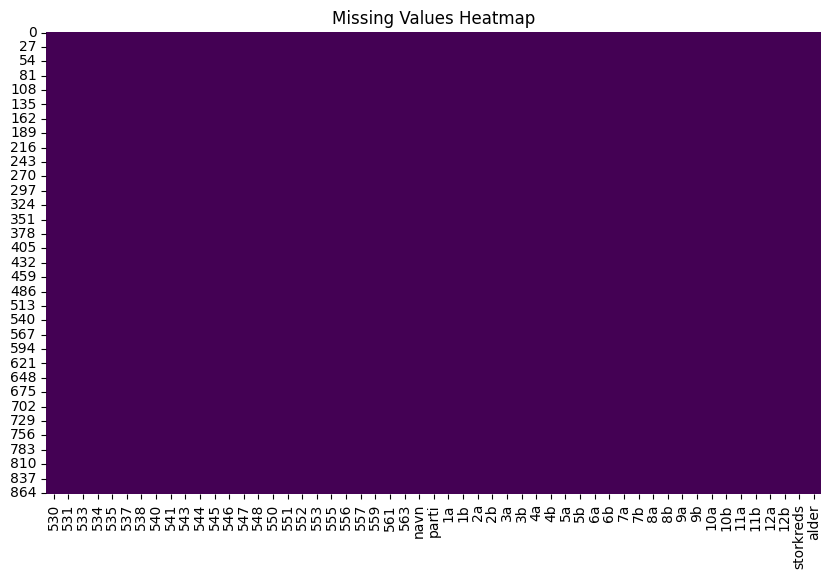

In [3]:
# Check missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [4]:
if df['navn'].duplicated().any():
    print("Warning: Duplicate candidate names found.")
else:
    print("Each candidate name is unique")

Each candidate name is unique


In [5]:
# Set name as index
df = df.set_index('navn')

# Store party of candidate in a separate column
party_data = df['parti']

# Remove non-numeric columns and age from analysis
columns_to_exclude = ['parti', 'parti_short', 'storkreds', 'alder']
analysis_columns = [col for col in df.columns if col not in columns_to_exclude]

#Matrix for scaling
X = df[analysis_columns]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to dataframe with the same index and column names
df_scaled = pd.DataFrame(X_scaled, 
                        columns=analysis_columns, 
                        index=df.index)

# PCA - Which questions are most cruical?

In [6]:
pca = PCA(n_components = 10)
X_pca = pca.fit_transform(df_scaled)

In [7]:
pca.explained_variance_ratio_


array([0.41737636, 0.10259865, 0.04976015, 0.04300927, 0.0293233 ,
       0.0237033 , 0.01994712, 0.01697463, 0.01676652, 0.01608279])

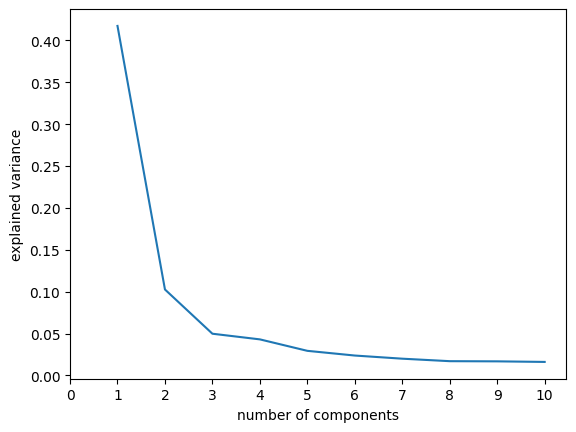

In [8]:
#Explained variance vs. number of components
plt.plot(list(range(1, 1 + len(pca.explained_variance_ratio_))), pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(0, 1 + len(pca.explained_variance_ratio_), step=1))
plt.show()

In [9]:
pca_2 = PCA(2)
X_pca_2 = pca_2.fit_transform(df_scaled)

# lets check how much variance is explained by the two components
print(pca_2.explained_variance_ratio_)

print("Sum of explained variance: ")
print(pca_2.explained_variance_ratio_.sum())


[0.41737636 0.10259865]
Sum of explained variance: 
0.5199750121793865


55% is not the best variance explained, but for visualization purposes, we should use only two principle component

In [10]:
pca_df = pd.DataFrame(data=X_pca_2, columns=['PC1', 'PC2'], index=df.index)
pca_df

PC1       PC2
navn                                        
Lars Philipsen Prahm     -3.362185 -1.516930
Karsten Hønge             6.091749  1.191952
Martin Kelleher-Petersen  4.960182 -1.096007
Nicklas Gjedsig Larsen    4.037529  0.834949
Tom Gillesberg            0.506901 -0.784739
...                            ...       ...
Maria Gudme               2.699541  3.049967
Maria Durhuus             2.688392  2.371944
Morten Bødskov            1.803416  3.104383
Jeppe Bruus               0.459532  1.604823
Gunvor Wibroe             4.131323  0.846309

[867 rows x 2 columns]

In [11]:
# Color codes from assignment graph
party_colors = {
    'Socialdemokratiet': '#b32722',  # Social Democrats
    'Venstre': '#006697',  # Danish Liberal Party
    'Moderaterne': '#6c39e5',  # Moderates
    'Socialistisk Folkeparti': '#dd0878',  # Socialist People's Party
    'Danmarksdemokraterne': '#054f5c',  # Denmark Democrats
    'Liberal Alliance': '#21c6cf',  # Liberal Alliance
    'Det Konservative Folkeparti': '#9eba27',  # Conservative People's Party
    'Enhedslisten': '#8ac3ff',  # Red-Green Alliance
    'Radikale Venstre': '#713280',  # Social Liberal Party
    'Nye Borgerlige': '#ed8019',  # New Right (Far-right)
    'Alternativet': '#2a8f39',  # The Alternative
    'Dansk Folkeparti': '#f3cd41',  # Danish People's Party
    'Frie Grønne, Danmarks Nye Venstrefløjsparti': '#00e66a',  # Free Greens
    'Kristendemokraterne': '#bababa',  # Christian Democrats
    'Løsgænger': 'skyblue'   #Independent
}

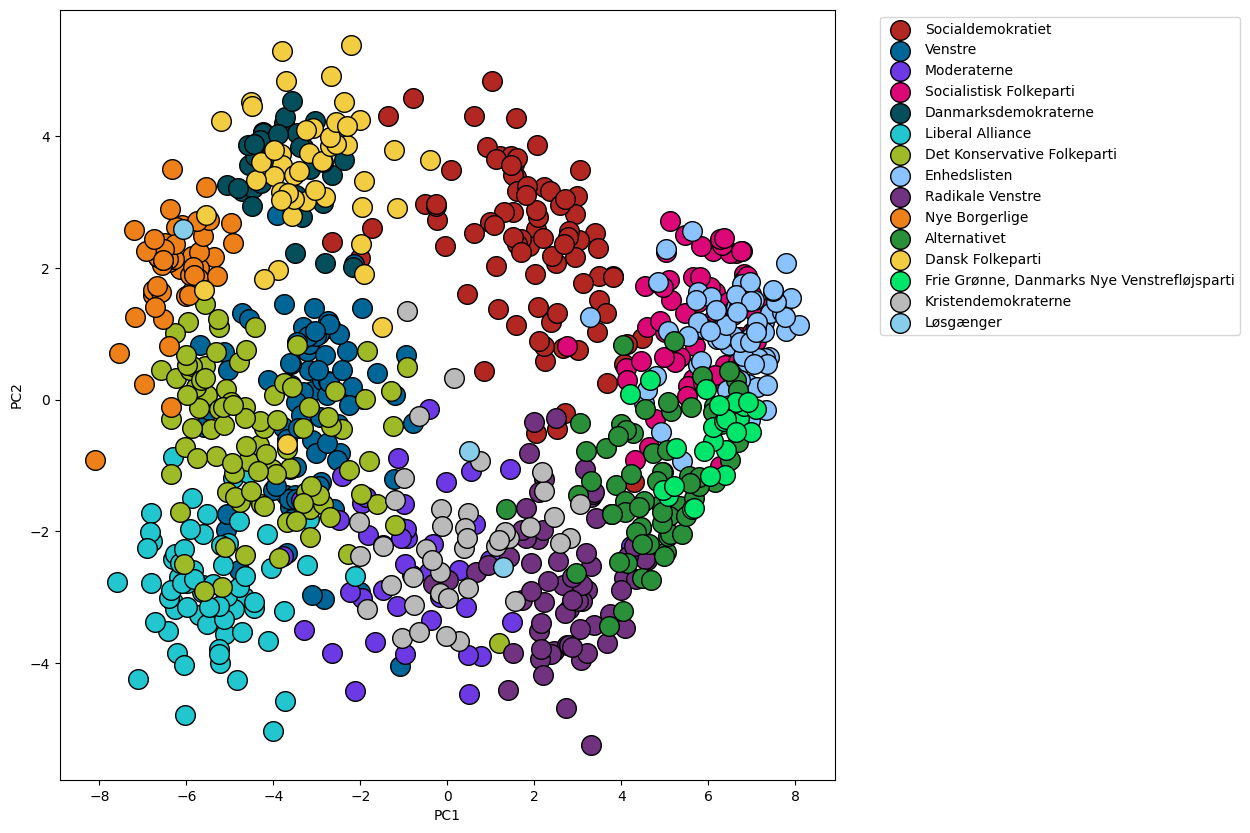

In [12]:
# lets plot the data from the pca

pca_df['party'] = party_data

plt.figure(figsize=(10, 10))

for party in party_colors.keys():
    party_df = pca_df[pca_df['party'] == party]
    plt.scatter(party_df['PC1'], party_df['PC2'], c=party_colors[party], label=party, edgecolors='black', s=200)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [13]:
feature_loadings = pd.DataFrame(
    data=pca.components_.T,
    columns=[f'PC{i+1}' for i in range(10)],
    index=df_scaled.columns
)

def get_top_features(loadings, n=10):
    return loadings.abs().nlargest(n)

top_features_pc1 = get_top_features(feature_loadings['PC1'])
top_features_pc2 = get_top_features(feature_loadings['PC2'])

print("Top features for PC1:")
print(top_features_pc1)
print("\nTop features for PC2:")
print(top_features_pc2)

Top features for PC1:
530    0.190641
537    0.190284
4a     0.188849
3b     0.188778
550    0.188555
531    0.187016
543    0.185893
548    0.176281
559    0.176279
540    0.174404
Name: PC1, dtype: float64

Top features for PC2:
10b    0.302918
556    0.297979
551    0.293836
553    0.272808
4b     0.258449
5a     0.228295
6a     0.208142
6b     0.207708
555    0.206750
534    0.201447
Name: PC2, dtype: float64


In [14]:
def create_combined_df(top_features, drq, tv2q):
    # Ensure ID data types match across all datasets
    drq['ID'] = drq['ID'].astype(str)
    tv2q['id'] = tv2q['id'].astype(str)
    top_features.index = top_features.index.astype(str)

    # Filter and rename columns to align structure
    dr_part = drq[drq['ID'].isin(top_features.index)][['ID', 'Question_eng', 'Title']]
    tv2_part = tv2q[tv2q['id'].isin(top_features.index)][['id', 'question_eng', 'header']]
    tv2_part = tv2_part.rename(columns={'id': 'ID', 'question_eng': 'Question_eng', 'header': 'Title'})

    # Combine the two datasets
    combined = pd.concat([dr_part, tv2_part])
    
    # Map 'Loading' values from 'top_features', handling any missing IDs
    combined['Loading'] = combined['ID'].map(top_features).fillna(0)  # or use another method to handle missing values

    return combined[['ID', 'Loading', 'Title', 'Question_eng']]


pc1_questions = create_combined_df(top_features_pc1, drq, tv2q)
pc2_questions = create_combined_df(top_features_pc2, drq, tv2q)

print("Top questions for PC1:")
display(pc1_questions)

print("\nTop questions for PC2:")
display(pc2_questions)

Top questions for PC1:


ID   Loading                         Title  \
0   530  0.190641               KLIMA OG ENERGI   
1   531  0.187016      ARBEJDSMARKED OG ØKONOMI   
5   537  0.190284                       VELFÆRD   
7   540  0.174404                       VELFÆRD   
9   543  0.185893                       VELFÆRD   
14  548  0.176281                       VELFÆRD   
15  550  0.188555      ARBEJDSMARKED OG ØKONOMI   
22  559  0.176279               KLIMA OG ENERGI   
55   3b  0.188778  Udenrigs- og forsvarspolitik   
56   4a  0.188849                       Økonomi   

                                         Question_eng  
0   Denmark should allocate more funds to strength...  
1   A special tax should be introduced for the hig...  
5                    Foreign aid should be increased.  
7   The state should compensate Danes more for ris...  
9   Additional resources should be allocated to el...  
14  Significantly more resources should be allocat...  
15  Additional resources should be allocated to th...  
22  If COVID-19 infection rates rise significantly...  
55                   Foreign aid should be increased.  
56  Economic inequality in Danish society should b...


Top questions for PC2:


ID   Loading                      Title  \
3   534  0.201447             EU OG UDENRIGS   
16  551  0.293836             EU OG UDENRIGS   
18  553  0.272808                 UDDANNELSE   
19  555  0.206750             EU OG UDENRIGS   
20  556  0.297979   ARBEJDSMARKED OG ØKONOMI   
57   4b  0.258449                    Økonomi   
58   5a  0.228295                      Ældre   
60   6a  0.208142  Flygtninge og indvandrere   
61   6b  0.207708  Flygtninge og indvandrere   
69  10b  0.302918              Socialområdet   

                                         Question_eng  
3             Denmark should eventually leave the EU.  
16  Part of the student support (SU) for higher ed...  
18  Public funds are being spent too much on helpi...  
19  The so-called 'Arne pension,' which allows for...  
20  There has been too much focus on Mette Frederi...  
57  The state should better compensate Danes for t...  
58  It is necessary to introduce user payments in ...  
60           Danish immigration policy is too strict.  
61  It would be a good idea to establish a Danish ...  
69  The so-called Arne pension, which allows for e...

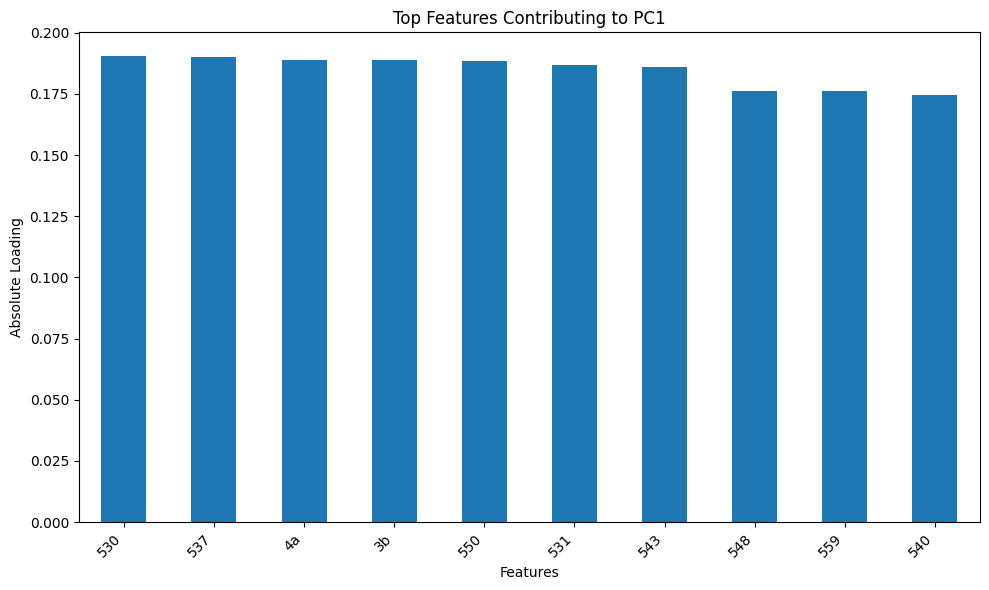

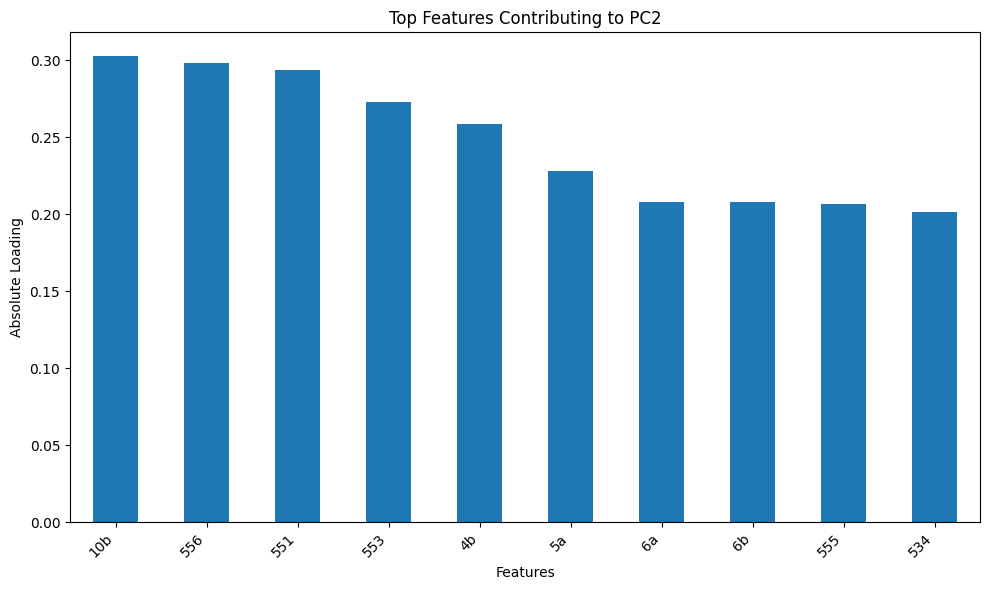

In [15]:
import matplotlib.pyplot as plt

def plot_top_features(top_features, title):
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Absolute Loading')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_top_features(top_features_pc1, 'Top Features Contributing to PC1')
plot_top_features(top_features_pc2, 'Top Features Contributing to PC2')

Let's plot the mean answers for each party for the PC1 and PC2 questions we looked at above:

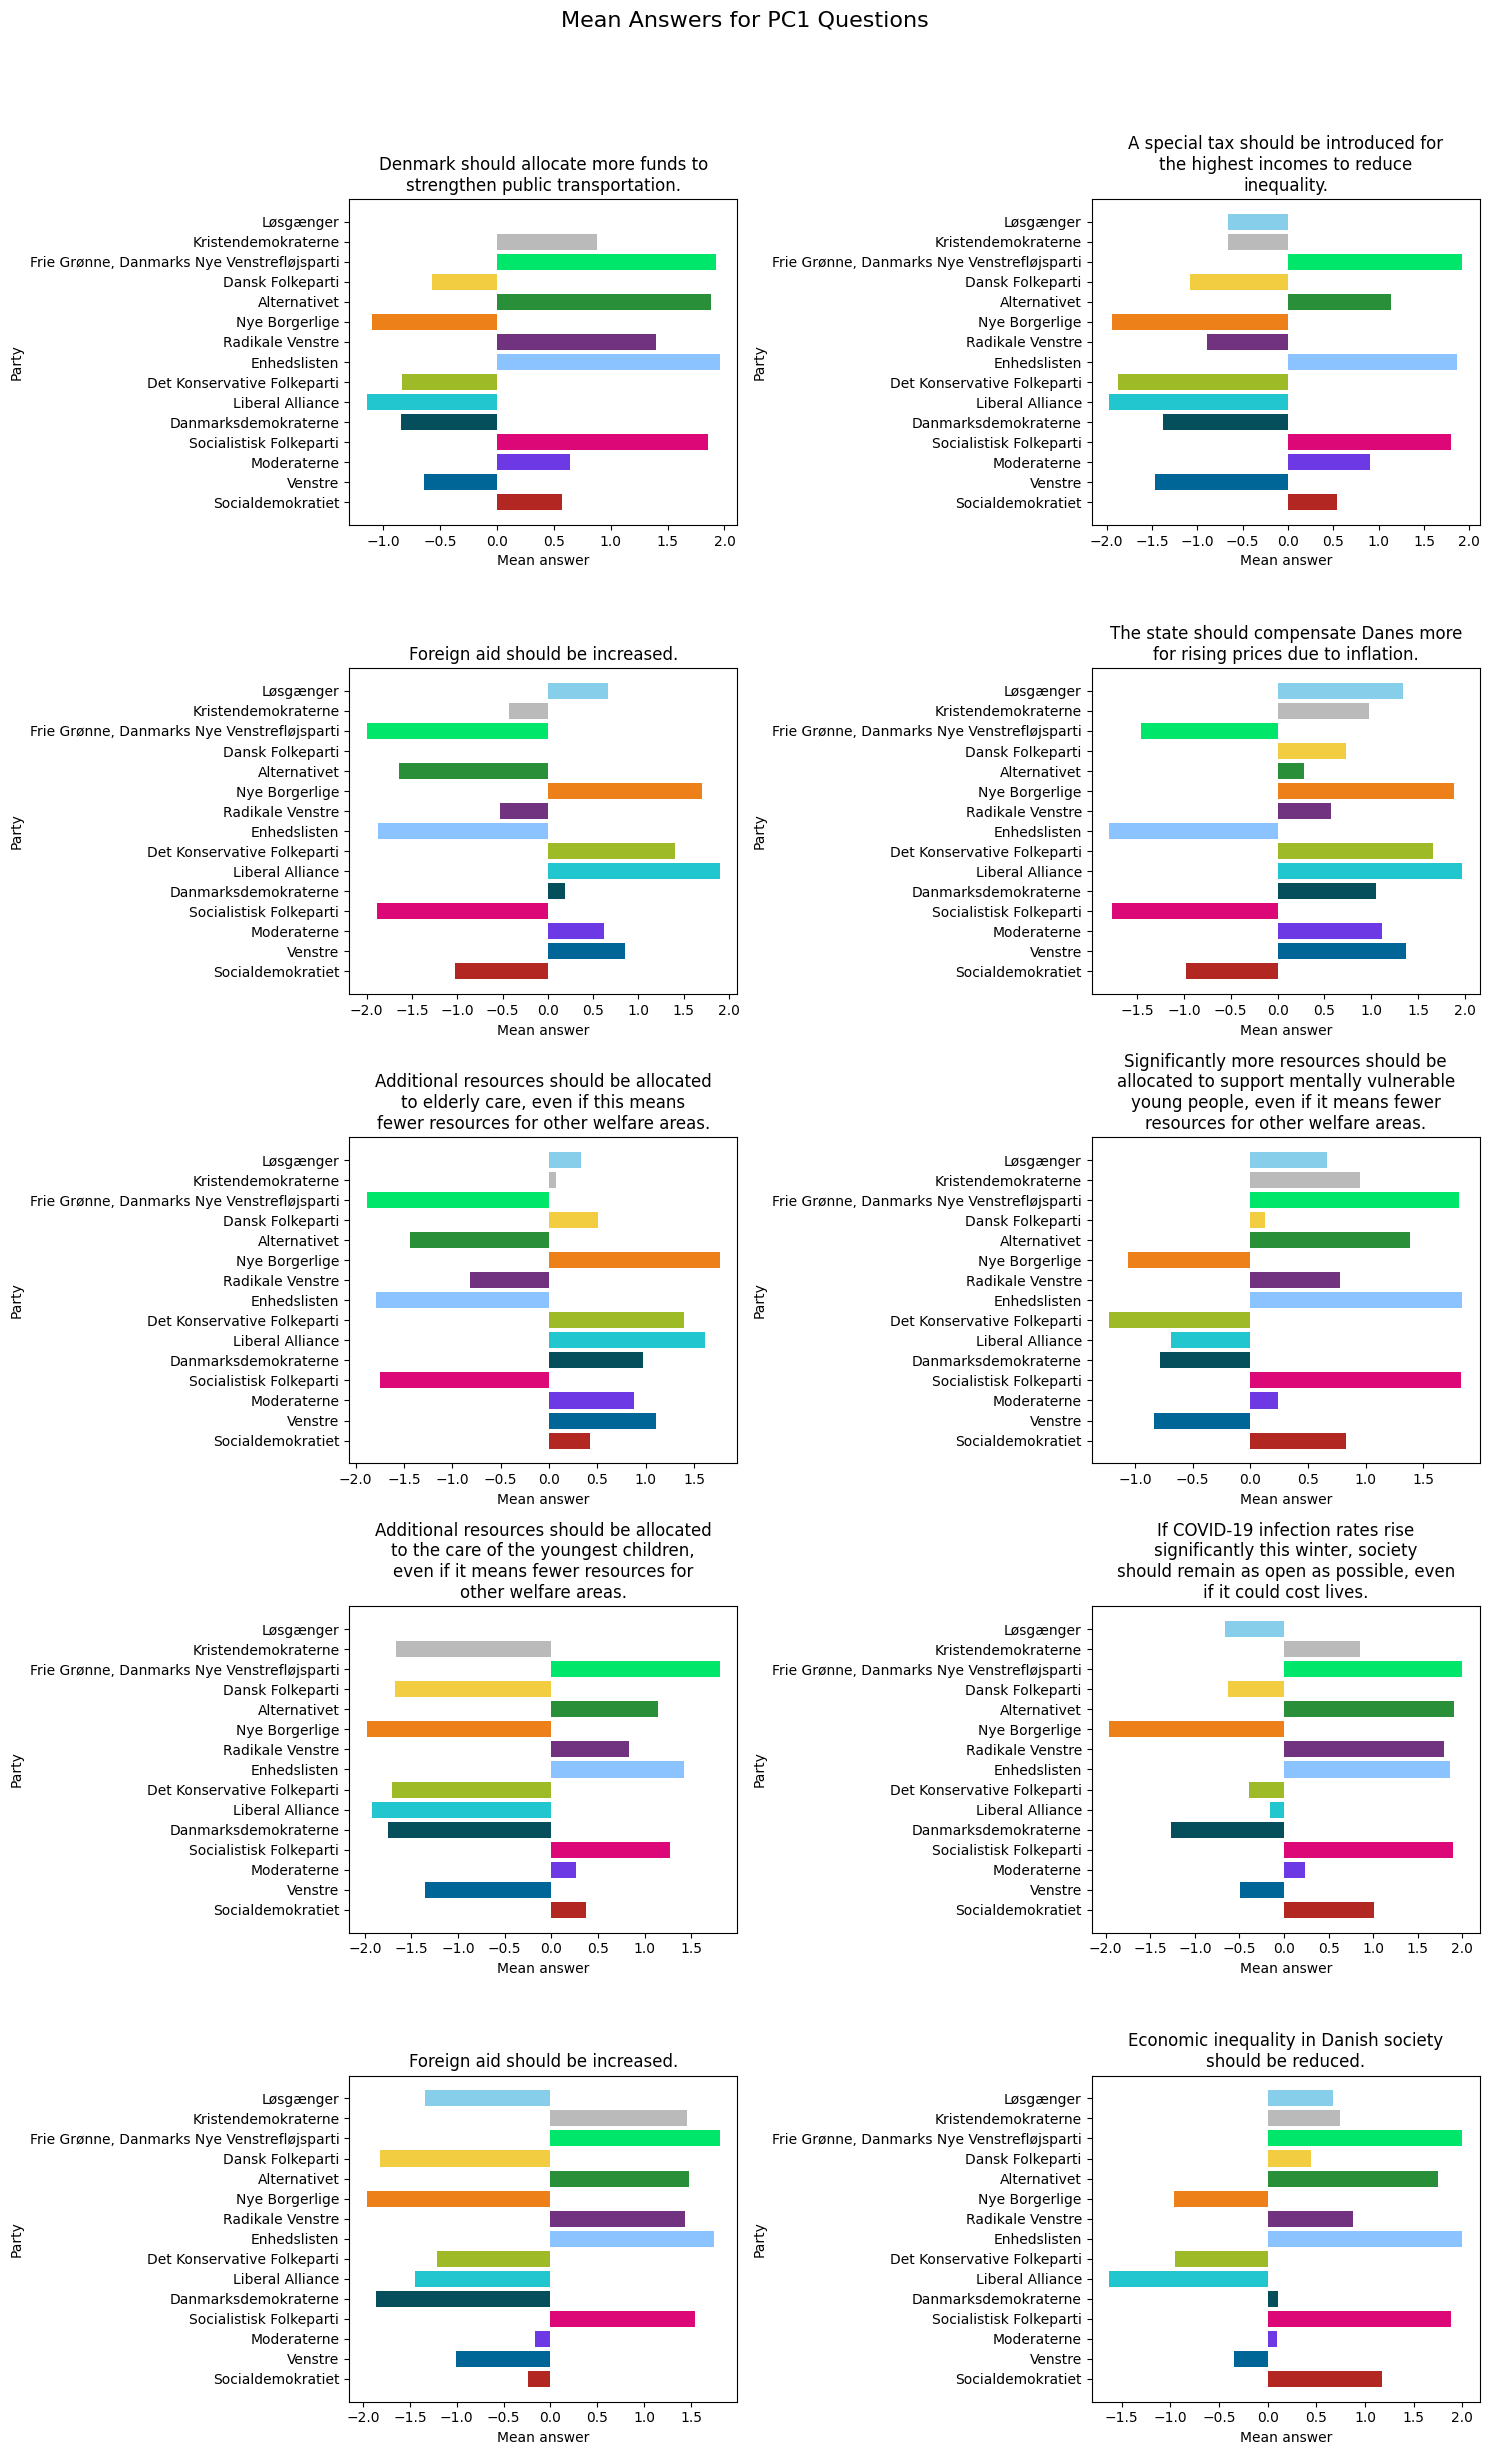

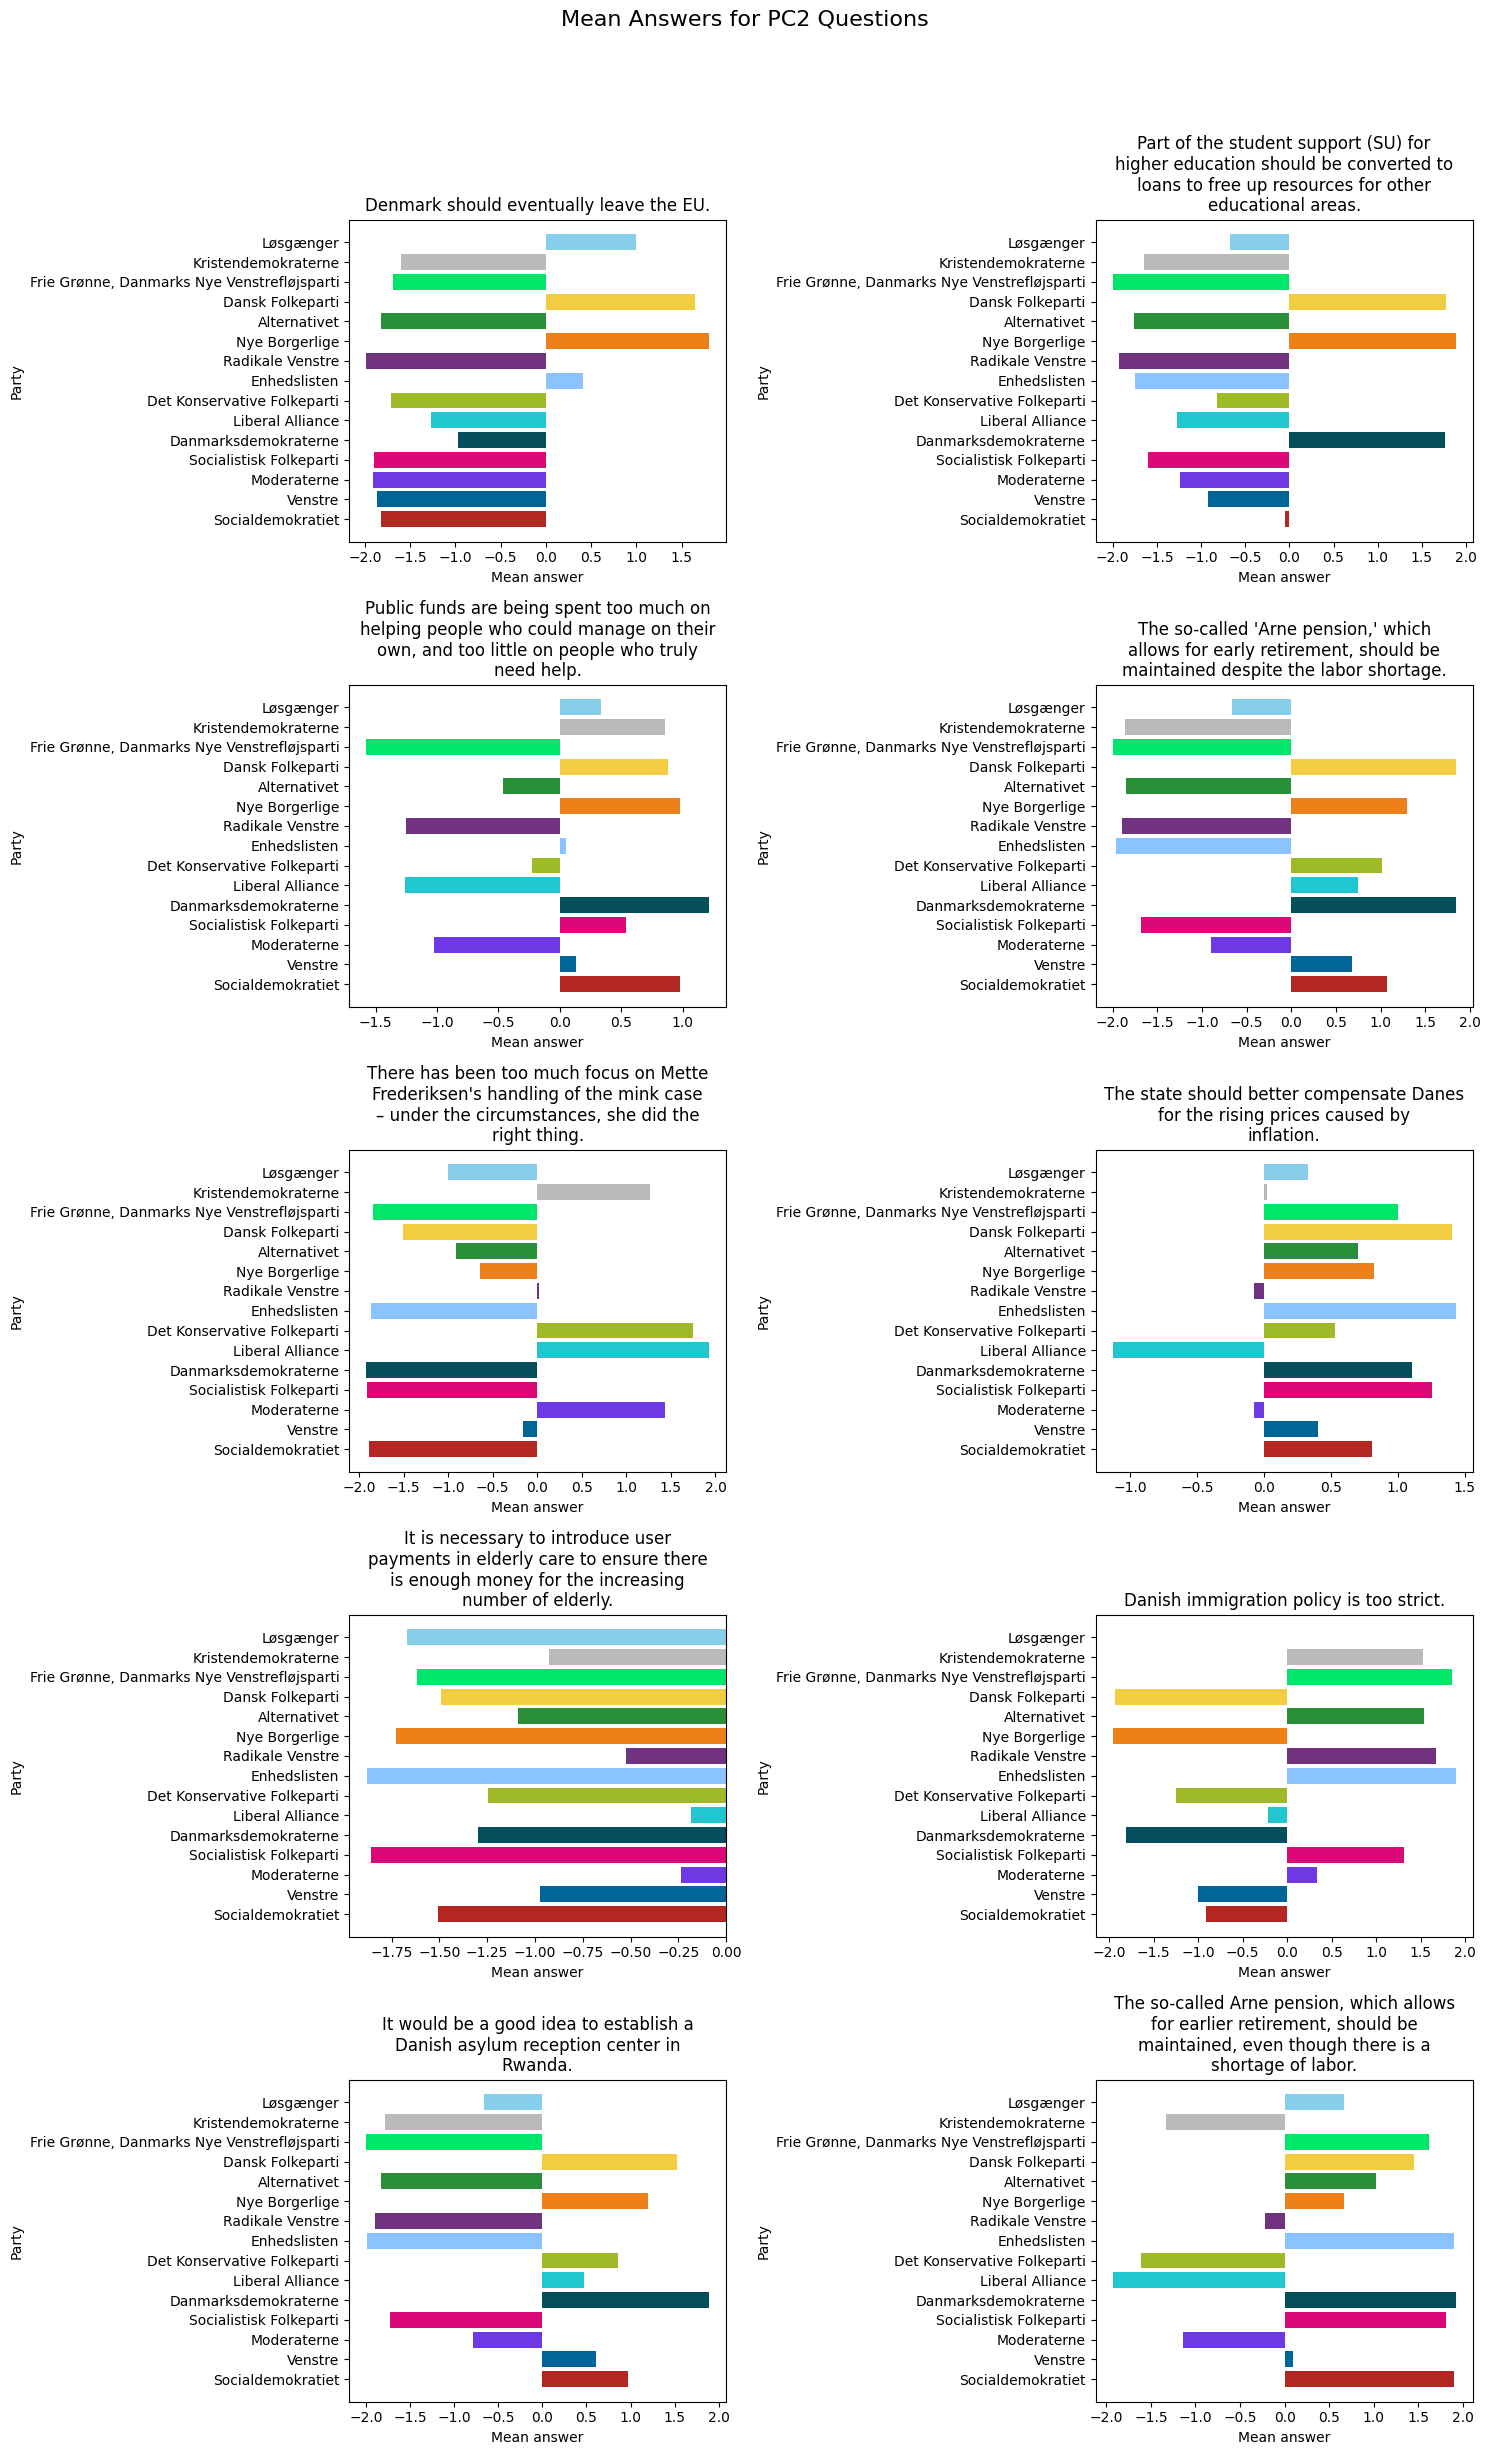

In [16]:
import textwrap

alldata = pd.read_excel('alldata.xlsx')
alldata = alldata.set_index('navn')

def plot_mean_answers(data, questions_data, party_colors, main_title):
    num_questions = len(questions_data)
    num_cols = 2  # Number of plots per row
    num_rows = (num_questions + num_cols - 1) // num_cols  # Calculate required rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Create subplots
    axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

    # Set the main title for the entire figure
    fig.suptitle(main_title, fontsize=16)

    for idx, question_id in enumerate(questions_data['ID']):
        question = data[str(question_id)]
        tmp = pd.concat([party_data, question], axis=1)
        tmp = tmp.groupby('parti').mean()

        # Plotting in the appropriate subplot
        for party in party_colors.keys():
            axes[idx].barh(party, tmp.loc[party], color=party_colors[party])

        # Wrap the title if it's too long
        title_text = questions_data[questions_data['ID'] == question_id]['Question_eng'].values[0]
        wrapped_title = textwrap.fill(title_text, width=40)  # Adjust width as needed

        axes[idx].set_title(wrapped_title)
        axes[idx].set_xlabel('Mean answer')
        axes[idx].set_ylabel('Party')

    # Hide any unused subplots
    for j in range(num_questions, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap and leave space for the title
    plt.show()

# Call the function for both question sets with main titles
plot_mean_answers(alldata, pc1_questions, party_colors, "Mean Answers for PC1 Questions")
plot_mean_answers(alldata, pc2_questions, party_colors, "Mean Answers for PC2 Questions")

# T-SNE

In [17]:
# Reducing dimensions using t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30)

tsne_data = tsne.fit_transform(df_scaled)

tsne_df = pd.DataFrame(data=tsne_data, columns=['t-SNE1', 't-SNE2'], index=df.index)

tsne_df['party'] = party_data

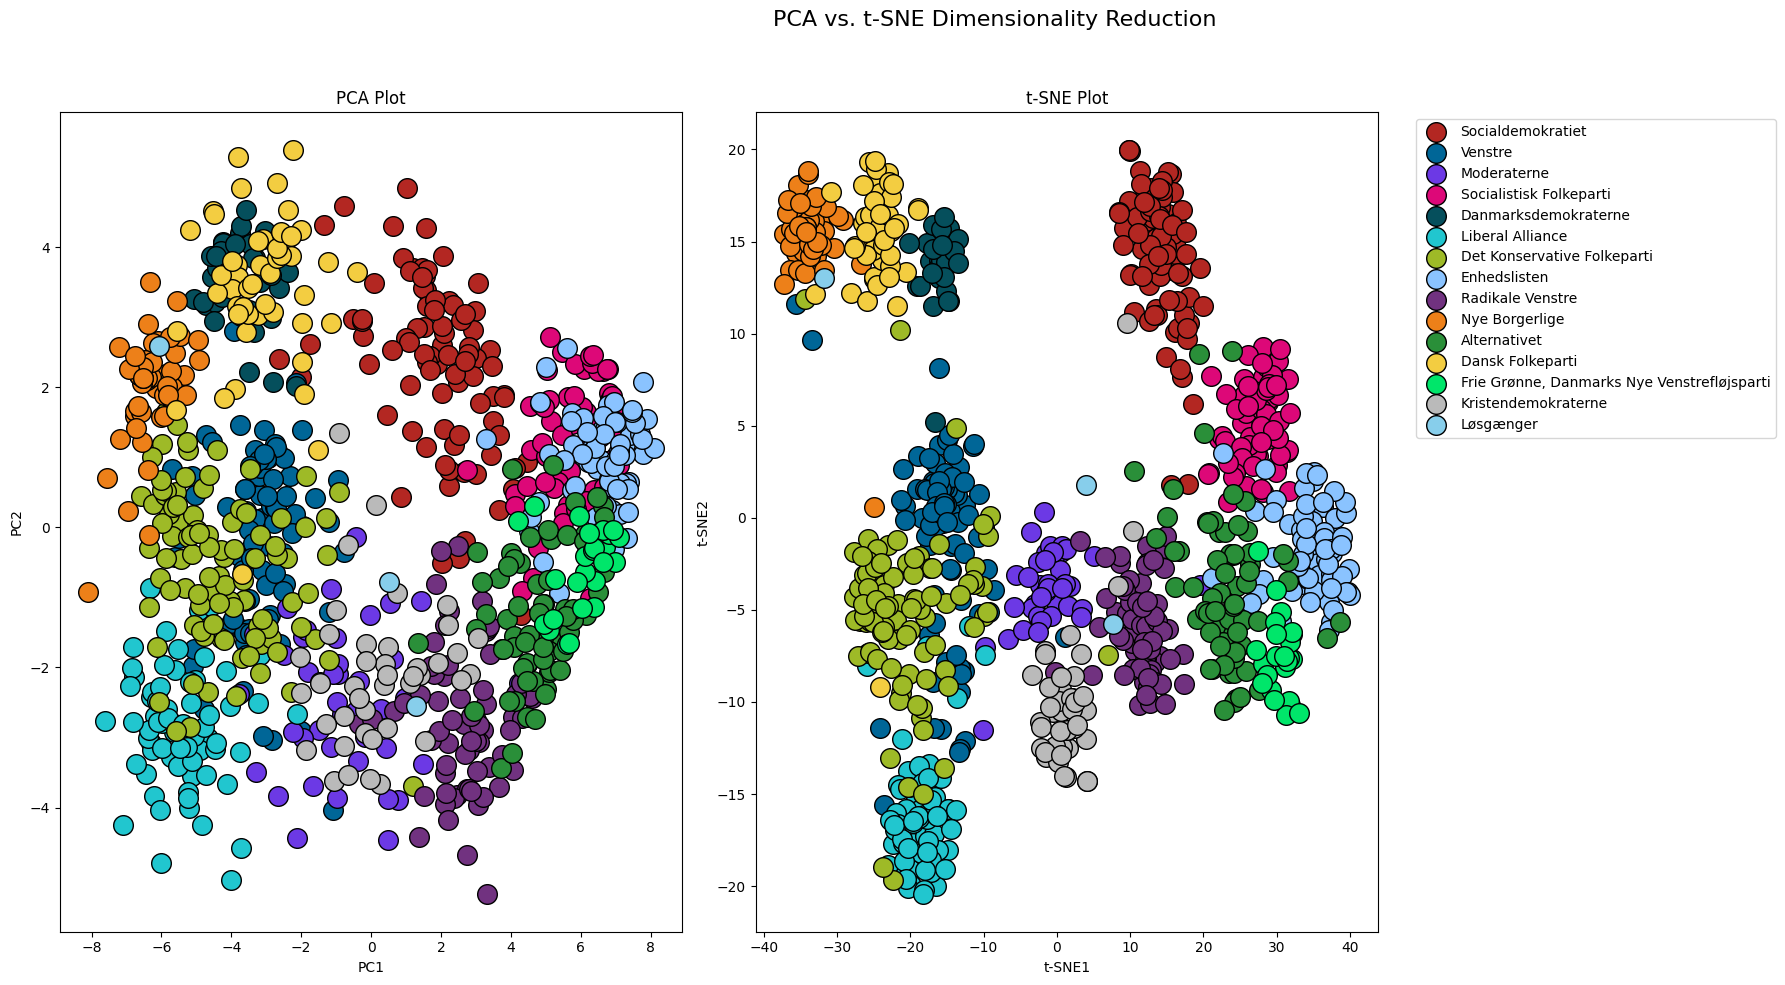

In [18]:
import matplotlib.pyplot as plt

# Create a figure with two subplots, side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot for PCA
for party in party_colors.keys():
    pparty_df = pca_df[pca_df['party'] == party]
    axes[0].scatter(pparty_df['PC1'], pparty_df['PC2'], c=party_colors[party], label=party, edgecolors='black', s=200)

axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('PCA Plot')


# Plot for t-SNE
for party in party_colors.keys():
    party_df = tsne_df[tsne_df['party'] == party]
    axes[1].scatter(party_df['t-SNE1'], party_df['t-SNE2'], c=party_colors[party], label=party, edgecolors='black', s=200)

axes[1].set_xlabel('t-SNE1')
axes[1].set_ylabel('t-SNE2')
axes[1].set_title('t-SNE Plot')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the main title for the whole figure
fig.suptitle('PCA vs. t-SNE Dimensionality Reduction', fontsize=16)

plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Adjust layout to fit the main title and legends
plt.show()


Conclusion: clusters are more visible with T-sne

# Clustering

We can do clustering with both PCA and T-SNE reduced data. There are 15 parties, so in theory there should be 15 clusters. Let's see.

### K-Means

K-Means with PCA

In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from numpy.random import multivariate_normal

In [20]:
pca_df = pca_df.drop('party', axis = 1)

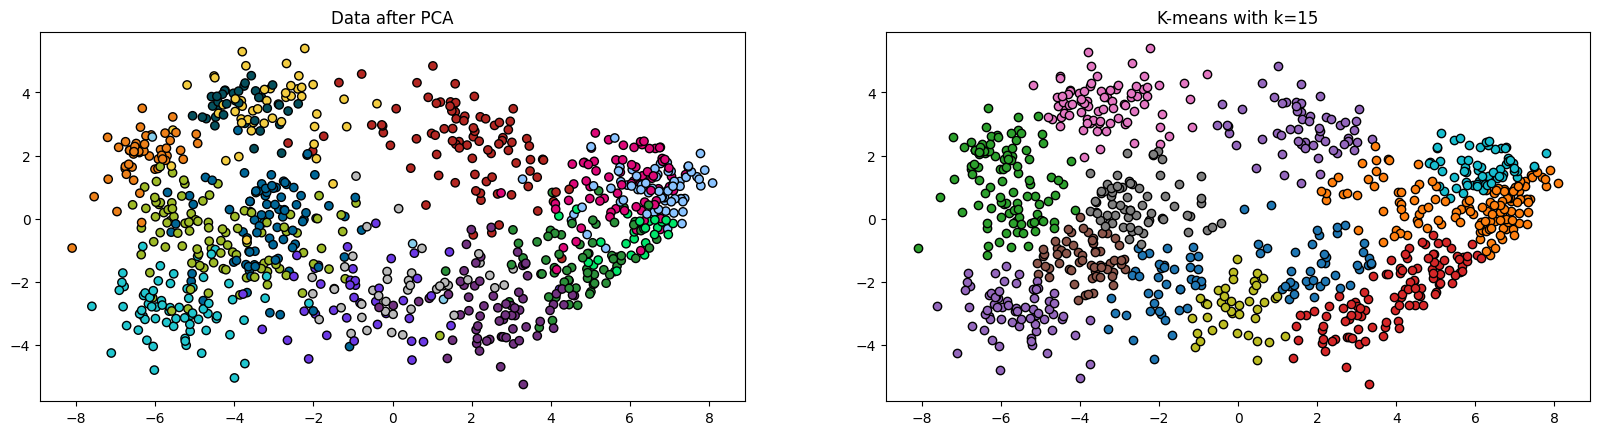

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


fig, ax  = plt.subplots(1,2)
fig.set_figwidth(20)

ax[0].set_title ('Data after PCA')
ax[0].scatter(pca_df['PC1'], pca_df['PC2'], edgecolors='black', c=[party_colors[party] for party in party_data])


kmeans15 = KMeans(n_clusters=15,  random_state=42)
kmeans15.fit_predict(pca_df)

ax[1].set_title('K-means with k=15')

for i in range(15):
    cluster = pca_df[kmeans15.labels_ == i]
    ax[1].scatter(cluster['PC1'], cluster['PC2'], label=f'Cluster {i}', edgecolors='black')

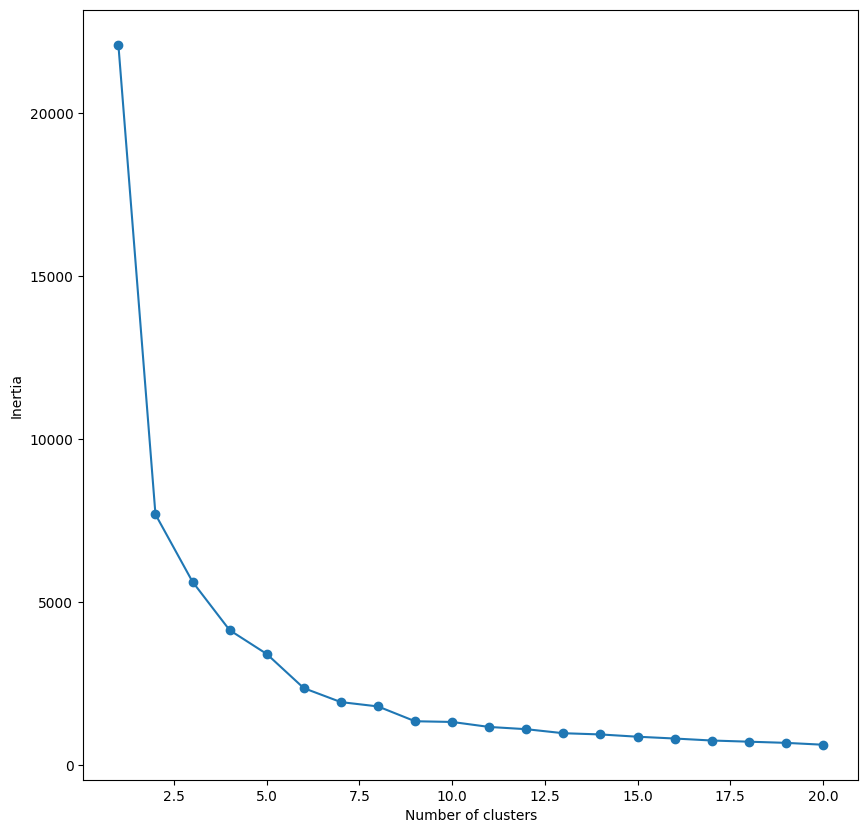

In [22]:
# elbow method to find a good number of clusters (k)

cost = []

for i in range(1, 21):

    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_df)
    cost.append(kmeans.inertia_)

plt.figure(figsize=(10, 10))

plt.plot(range(1, 21), cost, marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

It looks like 8 or 9 clusters can be sufficient - translated to real life: 8-9 Danish parties would be enough to represent different political views - the rest is overlapping  or not significant enough to be considered a separate cluster

In [23]:
kmeans9 = KMeans(n_clusters=9,  random_state=42)
kmeans9.fit_predict(pca_df)

array([0, 1, 3, 1, 8, 3, 8, 3, 8, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 6, 1, 6, 6, 6, 6, 0, 7, 7, 0, 0, 5, 6, 0, 7, 7, 1, 3,
       1, 1, 2, 6, 1, 6, 6, 6, 6, 8, 8, 8, 7, 7, 8, 8, 0, 8, 8, 0, 3, 5,
       0, 5, 5, 5, 5, 5, 5, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0,
       0, 8, 2, 0, 5, 0, 2, 7, 0, 0, 0, 8, 3, 3, 3, 3, 8, 3, 4, 4, 4, 4,
       6, 4, 4, 4, 4, 4, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 6, 6, 8, 0, 5, 0, 0, 0, 7, 7, 5, 0, 1, 1, 1, 1, 1, 1,
       1, 4, 6, 8, 0, 6, 6, 0, 8, 3, 8, 8, 3, 3, 8, 8, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 7, 0, 0, 0,
       2, 5, 2, 0, 7, 0, 3, 2, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3,
       4, 4, 4, 4, 3, 1, 4, 3, 4, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 6, 6, 6, 6, 7, 7, 8, 7, 0, 7, 7, 2, 3, 3, 6, 6, 2, 8, 8, 8,
       8, 8, 8, 3, 5, 5, 5, 0, 0, 5, 5, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 5, 7, 5, 2, 2, 0, 0, 3, 8, 3, 3, 3,

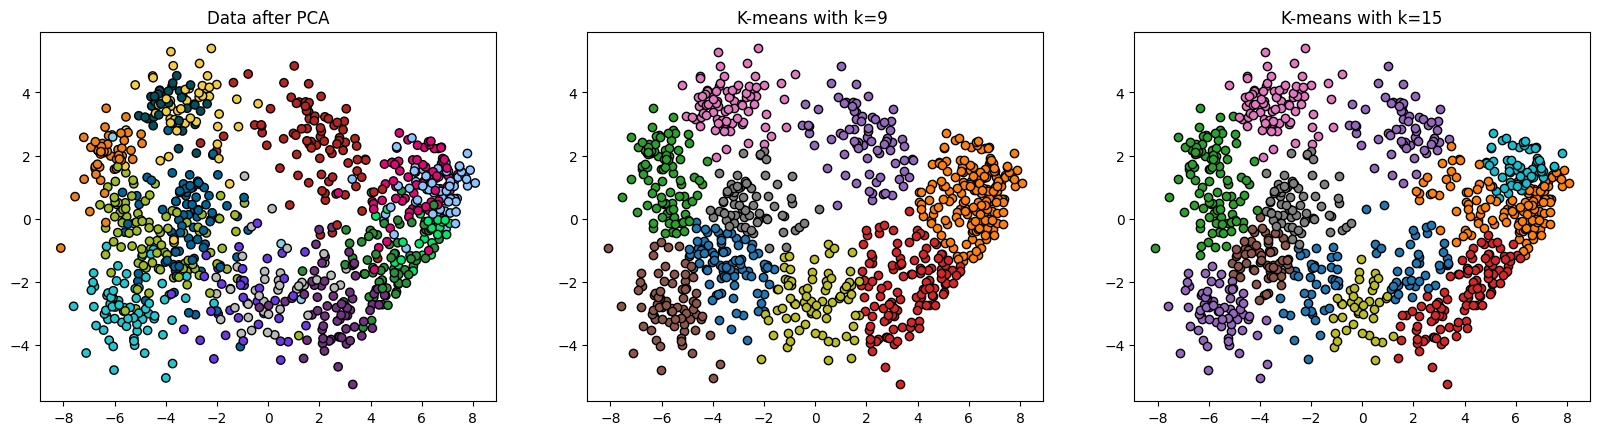

In [24]:


fig, ax = plt.subplots(1, 3)
fig.set_figwidth(20)

ax[0].set_title('Data after PCA')
ax[0].scatter(pca_df['PC1'], pca_df['PC2'], edgecolors='black', c=[party_colors[party] for party in party_data])

ax[1].set_title('K-means with k=9 ')
for i in range(9):
    cluster = pca_df[kmeans9.labels_ == i]
    ax[1].scatter(cluster['PC1'], cluster['PC2'], label=f'Cluster {i}', edgecolors='black')

ax[2].set_title('K-means with k=15')

for i in range(15):
    cluster = pca_df[kmeans15.labels_ == i]
    ax[2].scatter(cluster['PC1'], cluster['PC2'], label=f'Cluster {i}', edgecolors='black')




In [25]:
tsne_df.columns

Index(['t-SNE1', 't-SNE2', 'party'], dtype='object')

In [26]:
tsne_df = tsne_df.drop('party', axis = 1)

K-Means with t-sna

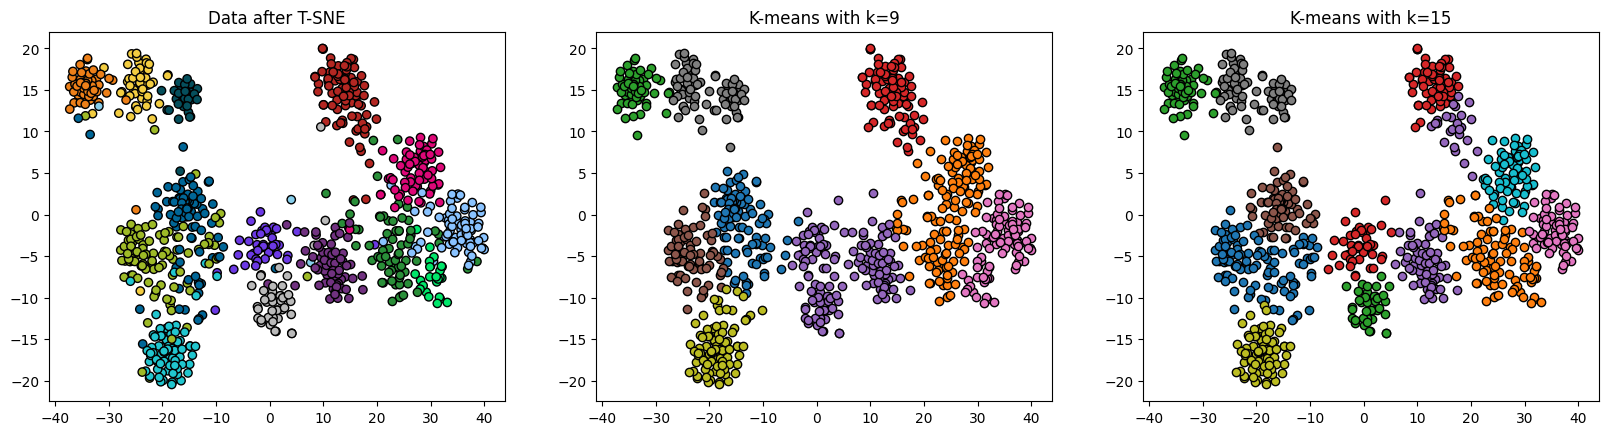

In [27]:
tsne_df_kmean9 = kmeans9.fit_predict(tsne_df)
tsne_df_kmean15 = kmeans15.fit_predict(tsne_df)

fig, ax = plt.subplots(1, 3)
fig.set_figwidth(20)

ax[0].set_title('Data after T-SNE')
ax[0].scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], edgecolors='black', c=[party_colors[party] for party in party_data])

ax[1].set_title('K-means with k=9')
for i in range(9):
    cluster = tsne_df[kmeans9.labels_ == i]
    ax[1].scatter(cluster['t-SNE1'], cluster['t-SNE2'], label=f'Cluster {i}', edgecolors='black')

ax[2].set_title('K-means with k=15')

for i in range(15):
    cluster = tsne_df[kmeans15.labels_ == i]
    ax[2].scatter(cluster['t-SNE1'], cluster['t-SNE2'], label=f'Cluster {i}', edgecolors='black')

# Hierarchical Clustering

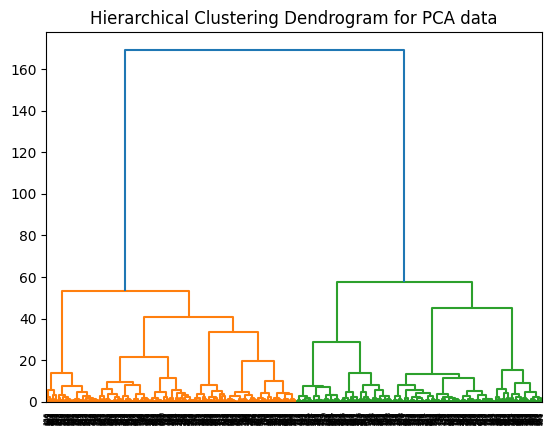

In [28]:
# Create clustering
hierarchical = AgglomerativeClustering(n_clusters=15)
hierarchical_pca = hierarchical.fit_predict(pca_df)

# Visualize dendrogram
linkage_matrix = ward(pca_df)
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram for PCA data')
plt.show()

According to the dendogram two cluster would be enough... our domain knowledge disagrees

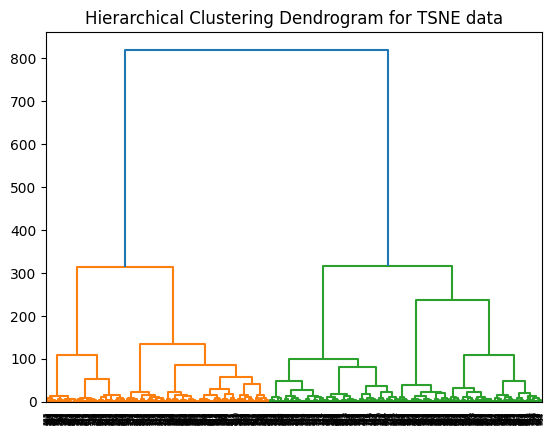

In [29]:
# Create clustering
hierarchical = AgglomerativeClustering(n_clusters=15,linkage='ward')
hierarchical_tsne = hierarchical.fit_predict(tsne_df)

# Visualize dendrogram
linkage_matrix = ward(tsne_df)
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram for TSNE data')
plt.show()

# DBSCAN

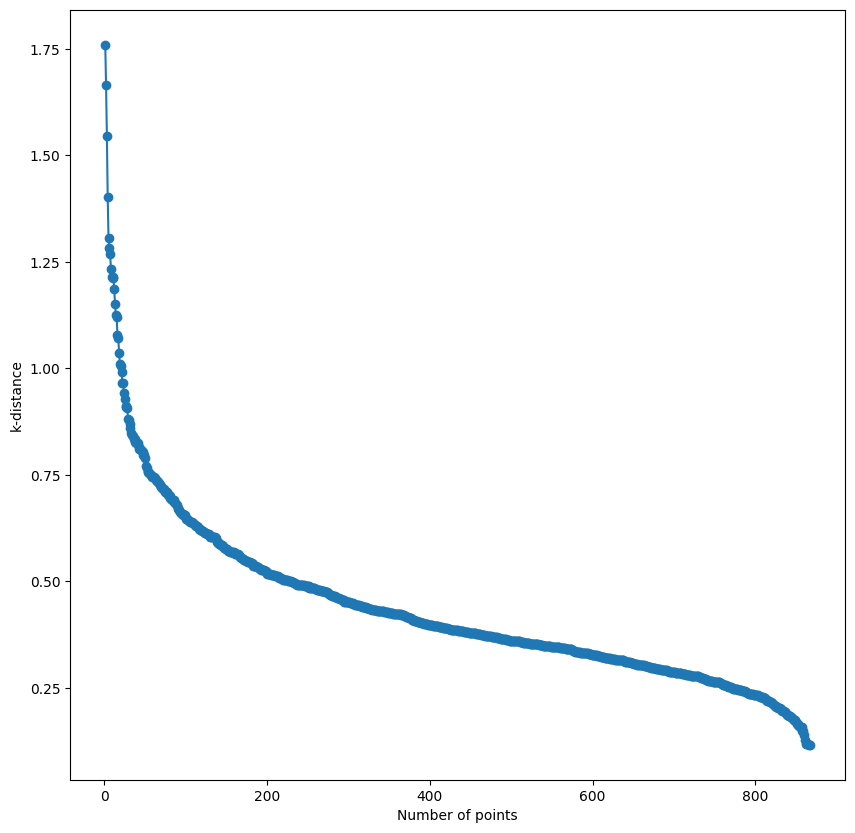

In [30]:
# first we need to find correct epsilon value, we can do it by plotting the distance between points and using kinda elbow method

def calculate_k_distance(X,k):
    k_distance = []
    for i in range(len(X)):
        dist = []
        for j in range(len(X)):
            dist.append(np.linalg.norm(X[i,:]-X[j,:]))
        dist.sort()
        k_distance.append(dist[k])
    k_distance.sort(reverse=True)
    return k_distance

min_points = 5

k_distance = calculate_k_distance(pca_df.values, min_points)

plt.figure(figsize=(10, 10))

plt.plot(range(1, len(k_distance)+1), k_distance, marker='o')

plt.xlabel('Number of points')

plt.ylabel('k-distance')

plt.show()

In [31]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_pca = dbscan.fit_predict(pca_df)
dbscan_tsne = dbscan.fit_predict(tsne_df)

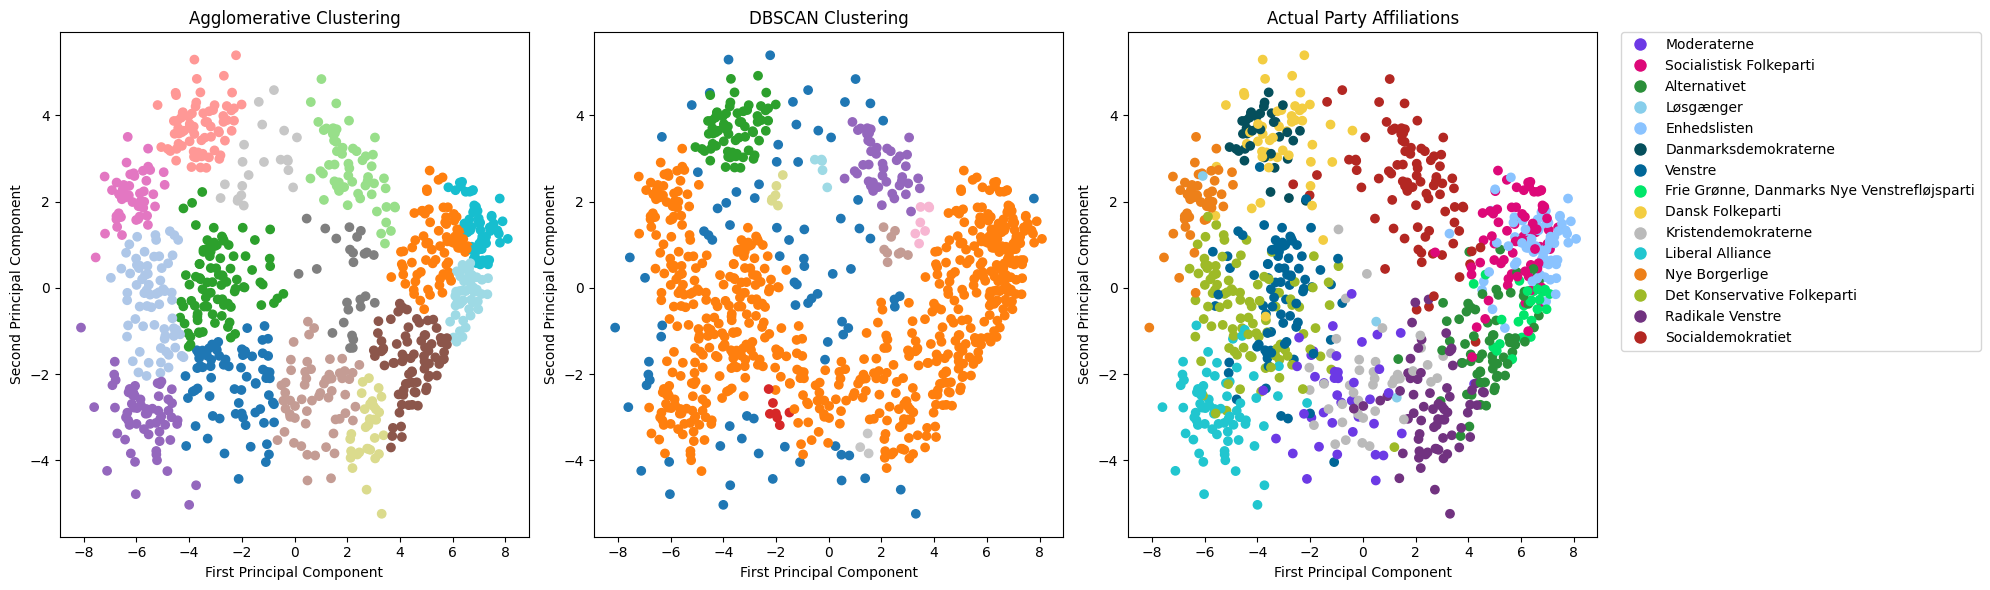

In [32]:
plt.figure(figsize=(20, 6))

# Plot 1: Agglomerative Clustering
plt.subplot(131)
agg_clustering = AgglomerativeClustering(n_clusters=15)  # Adjust number of clusters as needed
agg_labels = agg_clustering.fit_predict(pca_df)

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=agg_labels, cmap='tab20')
plt.title('Agglomerative Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot 2: DBSCAN
plt.subplot(132)
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(pca_df)

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=dbscan_labels, cmap='tab20')
plt.title('DBSCAN Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot 3: Comparison with actual party affiliations
plt.subplot(133)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                     c=[party_colors[party] for party in df['parti']])

# Create legend
unique_parties = df['parti'].unique()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=party_colors[party], 
                             label=party, markersize=10)
                  for party in unique_parties]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), 
          loc='upper left', borderaxespad=0.)

plt.title('Actual Party Affiliations')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.tight_layout()
plt.show()


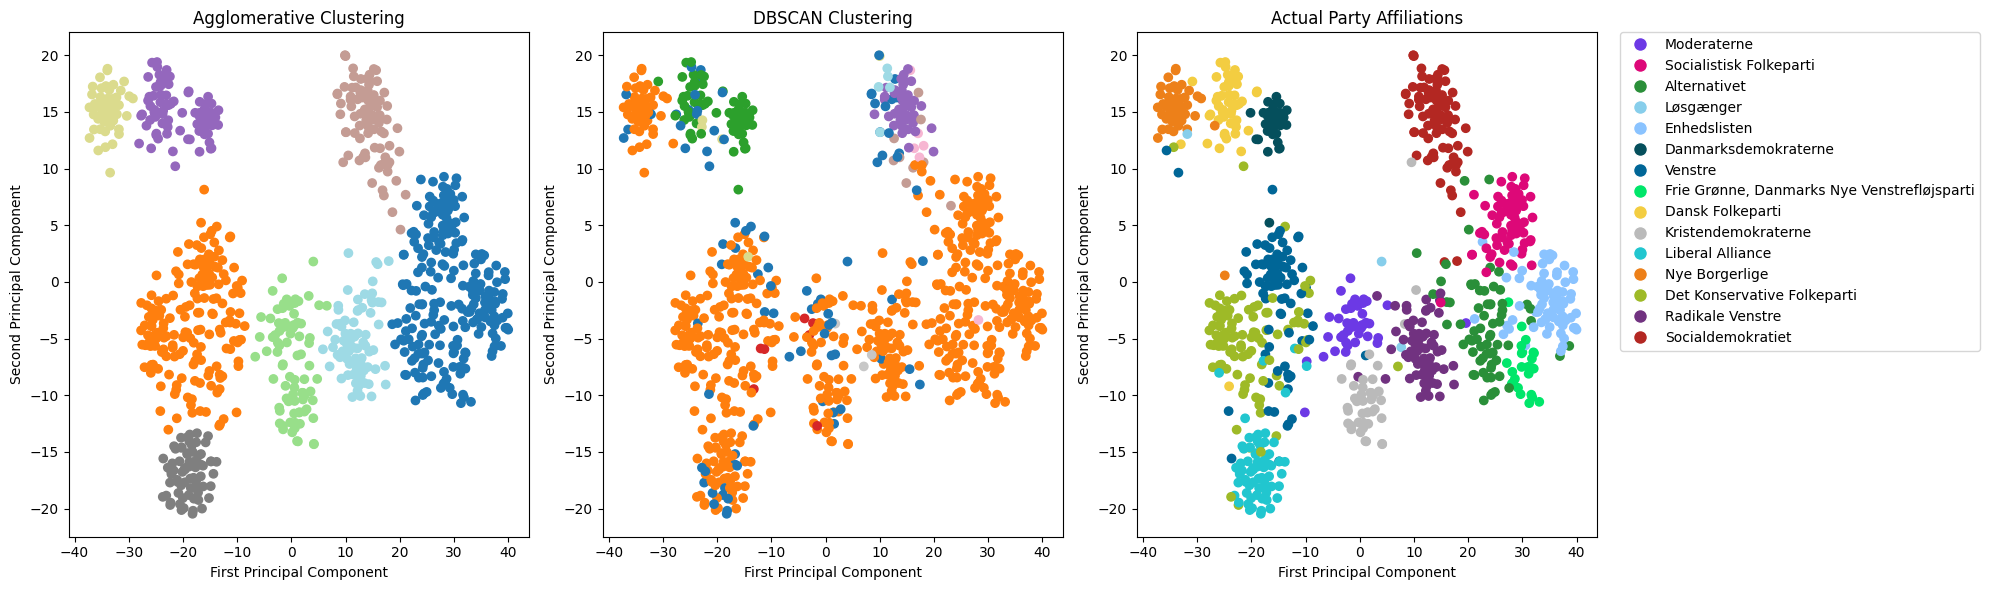

In [33]:
plt.figure(figsize=(20, 6))

# Plot 1: Agglomerative Clustering
plt.subplot(131)
agg_clustering = AgglomerativeClustering(n_clusters=8)  # Adjust number of clusters as needed
agg_labels = agg_clustering.fit_predict(tsne_df)

plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], c=agg_labels, cmap='tab20')
plt.title('Agglomerative Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot 2: DBSCAN
plt.subplot(132)
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(X_pca_2)

plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], c=dbscan_labels, cmap='tab20')
plt.title('DBSCAN Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot 3: Comparison with actual party affiliations
plt.subplot(133)
scatter = plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], c=[party_colors[party] for party in df['parti']])

# Create legend
unique_parties = df['parti'].unique()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=party_colors[party], 
                             label=party, markersize=10)
                  for party in unique_parties]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), 
          loc='upper left', borderaxespad=0.)

plt.title('Actual Party Affiliations')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.tight_layout()
plt.show()




Analysing the elected data - highlighting which members agree or disagree the most and which parties or party members have significant disagreements.


In [34]:

import plotly.express as px


# Load your data
electeddata = pd.read_excel('electeddata.xlsx')
elected = electeddata.set_index('navn')

# Prepare data
party_data = elected['parti']
elected = elected.drop(['alder', 'storkreds', 'parti'], axis=1)

# Scale the data
scaler = StandardScaler()
elected = pd.DataFrame(scaler.fit_transform(elected), columns=elected.columns, index=elected.index)

# Perform t-SNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(elected)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_data, columns=['t-SNE1', 't-SNE2'], index=elected.index)
tsne_df['party'] = party_data

# Reset index to use names in the hover text
tsne_df.reset_index(inplace=True)
tsne_df.rename(columns={'index': 'navn'}, inplace=True)

# Create an interactive scatter plot with custom colors
fig = px.scatter(tsne_df, x='t-SNE1', y='t-SNE2', color='party',
                 hover_name='navn',  # Candidate's name
                 title='t-SNE Visualization of Elected Members',
                 labels={'t-SNE1': 't-SNE1', 't-SNE2': 't-SNE2'},
                 color_discrete_map=party_colors)  # Use custom colors

# Update layout for better visualization
fig.update_traces(marker=dict(size=15,  # Increase marker size
                               line=dict(width=1, color='DarkSlateGrey'),
                               opacity=1))  # Adjust opacity for better visibility

fig.update_layout(legend_title_text='Party', legend=dict(x=1, y=1))

# Show the plot
fig.show()

Conclusions:
- Jon Læssøe Stephensen from Moderaterne has answered the questions way differently, then others from his party (according to his answers, he is grouped with Radikale Venstre members)
- We can see that members of Nye Borgerlige and Enhedslisten, and Radikale Venstre agree the most
- As Socialdemokratiet seems to have the most members, they are scattered the most
- Two members from Det Konservative Folkeparti has answered questions similarly to those from Venstre